In [54]:
import matplotlib.pyplot as plt
from astropy.time import Time
from astroplan.plots import plot_airmass
from astroplan import FixedTarget, Observer
import pandas as pd
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import pytz
from astroplan import Observer, FixedTarget

In [80]:
df = pd.read_table("globular_cluster_list.txt",sep='|', index_col=False,)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['name'] = df['name'].str.replace(" ","")

In [81]:
from astroplan import ObservingBlock
from astroplan.constraints import TimeConstraint
from astropy import units as u
from astroplan.scheduling import Transitioner

mcdonald_observatory = Observer(longitude = -104.022 * u.deg,
                    latitude = 30.6714 * u.deg,
                    elevation = 2077 * u.m,
                    timezone = 'US/Central',
                    name = "McDonald Observatory"
                    )

In [82]:
reference_time = Time("2023-05-01")

In [83]:
astro_set = mcdonald_observatory.twilight_evening_astronomical(reference_time, which='nearest')
astro_rise = mcdonald_observatory.twilight_morning_astronomical(reference_time, which='next')
midnight_mro = mcdonald_observatory.midnight(reference_time, which='next')

In [84]:
midnight_mro

<Time object: scale='utc' format='jd' value=2460065.7868648614>

In [85]:
df['whether_up'] = False

In [86]:
for index, row in df.iterrows():
    coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
    target = FixedTarget(name= row['name'], coord=coords)
    df.at[index,'whether_up'] = mcdonald_observatory.target_is_up(midnight_mro, target)

In [87]:
df

,name,alt_name,ra,dec,vmag,bv_color,helio_distance,metallicity,whether_up
0,Pal1,,03 33 20.04,+79 34 51.8,13.18,0.96,11.1,-0.65,True
1,NGC6229,,16 46 58.79,+47 31 39.9,9.39,0.70,30.5,-1.47,True
2,NGC6341,M 92,17 17 07.39,+43 08 09.4,6.44,0.63,8.3,-2.31,True
3,NGC2419,,07 38 08.47,+38 52 56.8,10.41,0.66,82.6,-2.15,True
4,NGC6205,M 13,16 41 41.24,+36 27 35.5,5.78,0.68,7.1,-1.53,True
5,Pal2,,04 46 05.91,+31 22 53.4,13.04,2.08,27.2,-1.42,False
6,NGC6779,M 56,19 16 35.57,+30 11 00.5,8.27,0.86,9.4,-1.98,True
7,Pal4,,11 29 16.80,+28 58 24.9,14.20,,108.7,-1.41,True
8,NGC5466,,14 05 27.29,+28 32 04.0,9.04,0.67,16.0,-1.98,True
9,NGC5272,M 3,13 42 11.62,+28 22 38.2,6.19,0.69,10.2,-1.50,True


In [88]:
df = df[df['whether_up'] == True]
df.reset_index(drop=True,inplace=True)

In [89]:
from astroplan.plots import plot_sky
import matplotlib.pyplot as plt
from astroplan import time_grid_from_range

start_time = astro_set
end_time = astro_rise

observing_range = [astro_set, astro_rise]
time_grid = time_grid_from_range(observing_range)

/opt/conda/lib/python3.9/site-packages/astroplan/plots/sky.py:120: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='polar')


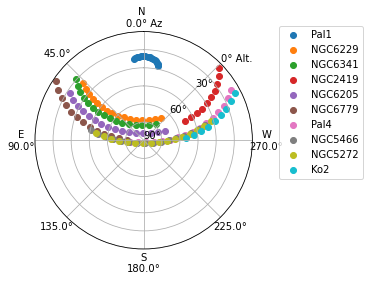

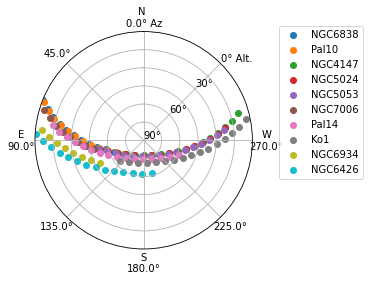

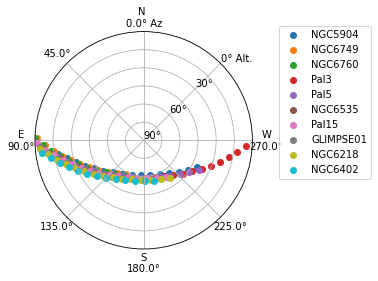

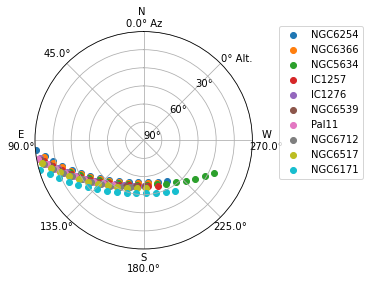

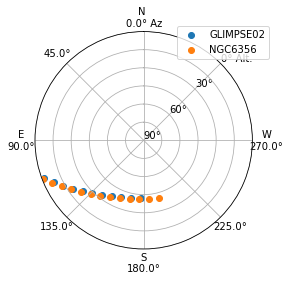

In [90]:
for a in range(0,5):
    #plt.subplot(15 * 10 + a + 1)
    for index, row in df[a * 10 :(a + 1) * 10].iterrows():
        coords = SkyCoord(row['ra'] + " " + row['dec'], frame="icrs", unit=(u.hourangle, u.deg))
        target = FixedTarget(name= row['name'], coord=coords)
        ax = plot_sky(target, mcdonald_observatory, time_grid ) 
        ax.plot(label= row['name'])
    ax.legend(bbox_to_anchor=(1.1, 1.05))
    plt.show()

In [91]:
arr = ["NGC5272", "NGC5466","NGC6838","Pal10", "NGC4147", "NGC5024", "NGC5053", "NGC7006","Pal5", "NGC5904"]
df[df['name'].isin(arr)]

,name,alt_name,ra,dec,vmag,bv_color,helio_distance,metallicity,whether_up
7,NGC5466,,14 05 27.29,+28 32 04.0,9.04,0.67,16.0,-1.98,True
8,NGC5272,M 3,13 42 11.62,+28 22 38.2,6.19,0.69,10.2,-1.50,True
10,NGC6838,M 71,19 53 46.49,+18 46 45.1,8.19,1.09,4.0,-0.78,True
11,Pal10,,19 18 02.10,+18 34 18.0,13.22,,5.9,-0.10,True
12,NGC4147,,12 10 06.30,+18 32 33.5,10.32,0.59,19.3,-1.80,True
13,NGC5024,M 53,13 12 55.25,+18 10 05.4,7.61,0.64,17.9,-2.10,True
14,NGC5053,,13 16 27.09,+17 42 00.9,9.47,0.65,17.4,-2.27,True
15,NGC7006,,21 01 29.38,+16 11 14.4,10.56,0.75,41.2,-1.52,True
20,NGC5904,M 5,15 18 33.22,+02 04 51.7,5.65,0.72,7.5,-1.29,True
24,Pal5,,15 16 05.25,-00 06 41.8,11.75,,23.2,-1.41,True


In [94]:
df = df[df['name'].isin(arr)]
df.reset_index(drop=True,inplace=True)